In [1]:
%run RunningTimeExperiment.py

In [2]:
# initialize random
rand = Random(12345)

# figure settings
INTERACTIVE_CHARTS = False
ns = [500, 1000, 2000, 5000, 10000, 20000, 50000]
NUM_ITERATIONS = 10

# demo
# INTERACTIVE_CHARTS = True
# ns = [500, 1000, 2000, 5000]
# NUM_ITERATIONS = 5

----
## Algorithm Implementations

### (1) Bubble Sort

Taken from Lecture 1 slides.

In [3]:
def is_sorted(xs: List[int]) -> bool:
    n = len(xs)
    for i in range(n - 1):
        if xs[i] > xs[i + 1]:
            return False
    return True

def bubble_sort(xs: List[int]) -> None:
    n = len(xs)
   
    while not is_sorted(xs):
        for i in range(n - 1):
            if xs[i] > xs[i + 1]:
                xs[i], xs[i + 1] = xs[i + 1], xs[i]

### (2) Mergesort

Taken from Lecture 3.

In [4]:
def merge(xs: List[int], a: List[int], b: List[int]) -> None:
    n, na, nb = len(xs), len(a), len(b)
    ia, ib = 0, 0

    for i in range(n):
        if ib == nb or (ia < na and a[ia] <= b[ib]):
            xs[i] = a[ia]
            ia += 1
        else:
            xs[i] = b[ib]
            ib += 1

def mergesort(xs: List[int]) -> None:
    n = len(xs)
    if n <= 1:
        return

    m = n // 2
    a, b = xs[:m], xs[m:]
    
    mergesort(a)
    mergesort(b)
    merge(xs, a, b)

### (3) Tim Sort

Python's default sorting algorithm.

In [5]:
def tim_sort(xs: List[int]) -> None:
    xs.sort()

----
## Testing

In [6]:
def test(f):
    xs = [2, 5, 3, 2, 9, 1, 4, 7, 3, 8]
    f(xs)
    assert xs == sorted(xs)

test(mergesort)
test(tim_sort)
test(bubble_sort)
print('ok')

ok


----
## Experiments

In [7]:
rte = RunningTimeExperiment()

# generate instances
for n in ns:
    print(f'Creating a problem instance: n={n}')
    xs = rand.sample(range(0, 1000000000), n)  # pick n distinct integers between [0, 10^9)
    rte.add_instance(n, xs)

# register algorithms
rte.add_algorithm('bubble', bubble_sort)
rte.add_algorithm('merge', mergesort)
rte.add_algorithm('tim', tim_sort)

Creating a problem instance: n=500
Creating a problem instance: n=1000
Creating a problem instance: n=2000
Creating a problem instance: n=5000
Creating a problem instance: n=10000
Creating a problem instance: n=20000
Creating a problem instance: n=50000


In [8]:
rte.validate()
rte.run(NUM_ITERATIONS)

Validating algorithms...ok
Running measurment (algorithm=bubble): |n=500:..........|n=1000:..........|n=2000:..........|n=5000:..........|n=10000:..........|n=20000:..........|n=50000:..........|
Running measurment (algorithm=merge): |n=500:..........|n=1000:..........|n=2000:..........|n=5000:..........|n=10000:..........|n=20000:..........|n=50000:..........|
Running measurment (algorithm=tim): |n=500:..........|n=1000:..........|n=2000:..........|n=5000:..........|n=10000:..........|n=20000:..........|n=50000:..........|


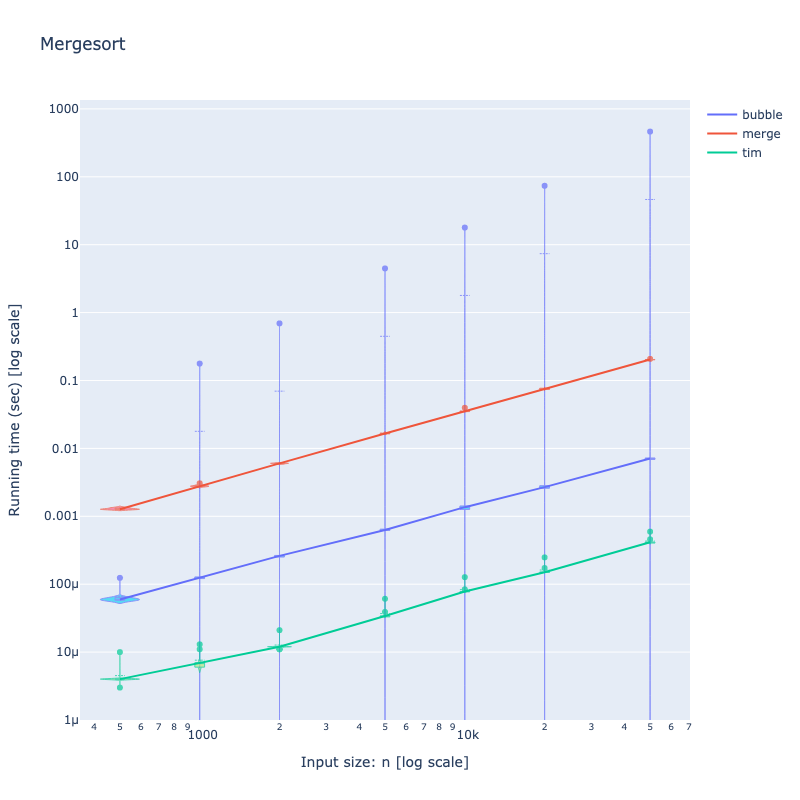

In [9]:
show_figure(rte.create_figure('Mergesort', xscale='log', yscale='log'), None if INTERACTIVE_CHARTS else 'img/04_4_Mergesort.png')